In [1]:
%run tools.ipynb

In [7]:
case_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-casa-2018-03/nd51/'
fname = 'ts_satellite.201803.nc' # 4 and 5 left
ds = xr.open_dataset(case_dir + fname)
dr = ds['SpeciesConc_CO2'][0,0,:,:]
mask = regionmask.defined_regions.giorgi.mask(dr)


In [30]:
# get a subset of data, and draw global plot
variable_name = 'SpeciesConc_CO2Tag10' # variable name
lev_nm        = 0                     # level
day           = 41                     # day of sim

dr = ds['SpeciesConc_CO2Tag10'][0,0,:,:]*1e-3 + ds['SpeciesConc_CO2Tag11'][0,0,:,:]*1e-3 - 200 # unit converted to ppm


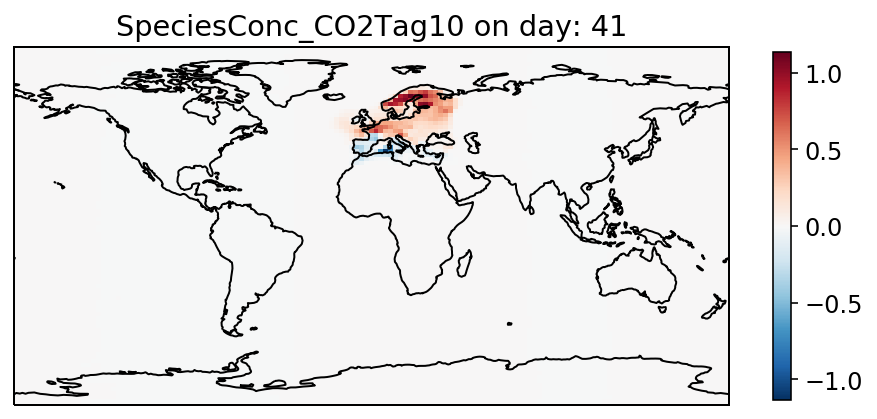

In [31]:
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)
### mapping the variable
dr.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.8,})
ax.set_title(variable_name + ' on day: ' + str(day))
ax.coastlines();

In [19]:
# get regional mean values of the previous variable
dr_180 = ds[variable_name].isel(lev=lev_nm)*1e-3 - 100 # unit converted to ppm
co2_regional = dr_180.groupby(mask).mean('stacked_lat_lon')

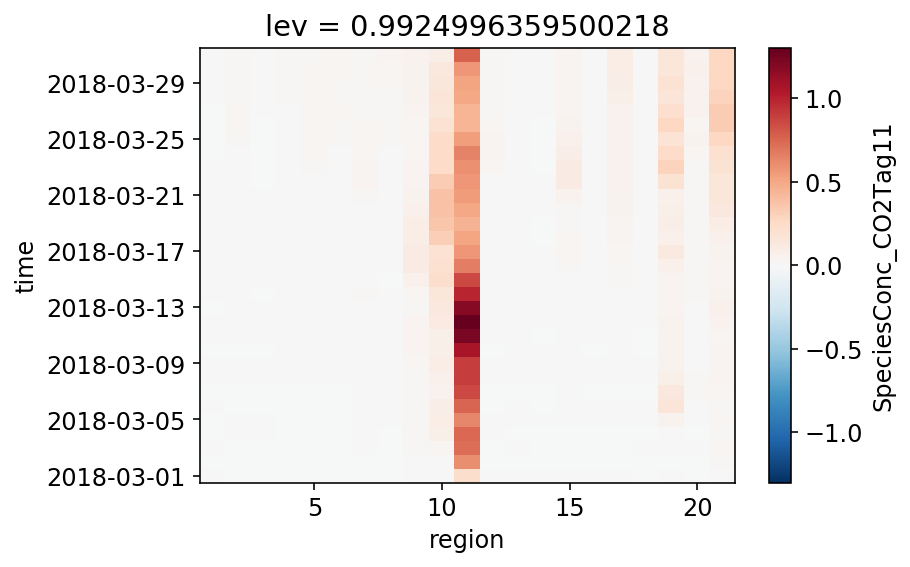

In [20]:
co2_regional.plot()

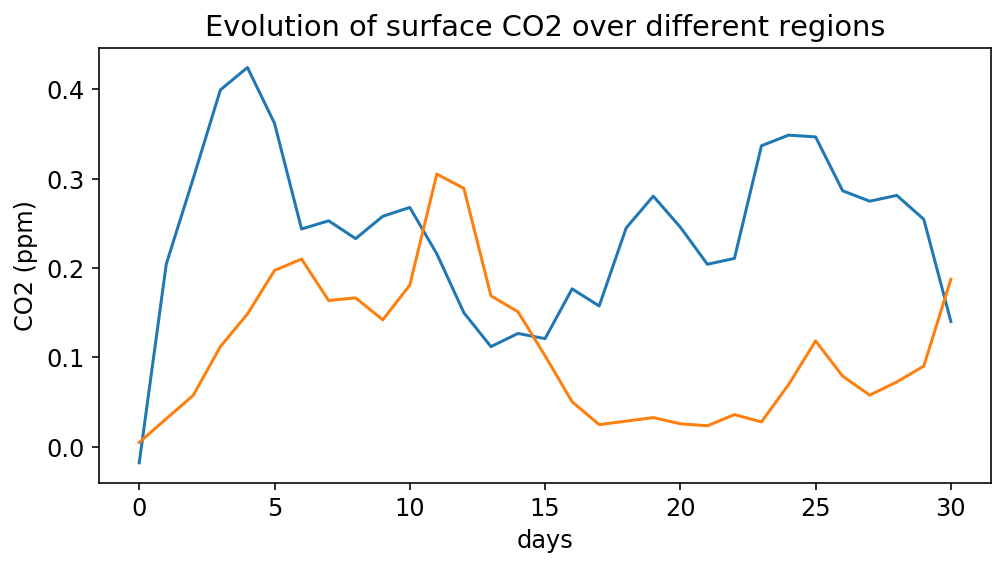

In [35]:

# get regional mean values of the previous variable
dr_180 = ds[variable_name].isel(lev=lev_nm)*1e-3 - 100 # unit converted to ppm
co2_regional = dr_180.groupby(mask).mean('stacked_lat_lon')

fig = plt.figure(figsize=[8, 4])

for iregion in range(10,12):
    plt.plot(co2_regional.sel(region = iregion), label=iregion)
    #plt.ylim(top=4)  # adjust the top leaving bottom unchanged
    #plt.ylim(bottom=0)  # adjust the bottom leaving top unchanged
    plt.title('Evolution of surface CO2 over different regions')
    plt.ylabel('CO2 (ppm)')
    plt.xlabel('days')
    
#fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/python/data/CO2_evolution_Mar.png', dpi=300)